In [89]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [17]:
DF = pd.read_csv('../datasets/weight-height.csv',dtype={'Height':np.float16})
DF['Gender'] = DF['Gender'].astype('str')
DF['Weight'] = DF['Weight'].astype('int')
print(len(DF))
DF.head()

10000


,Gender,Height,Weight
0,Male,73.8750,241
1,Male,68.8125,162
2,Male,74.1250,212
3,Male,71.7500,220
4,Male,69.8750,206


In [110]:
DF.drop(DF.index[0:10])

,Gender,Height,Weight
10,Male,71.1875,186
11,Male,71.6250,213
12,Male,64.7500,167
13,Male,69.3125,189
14,Male,69.2500,186
...,...,...,...
9995,Female,66.1875,136
9996,Female,67.0625,170
9997,Female,63.8750,128
9998,Female,69.0625,163


In [97]:
DF.append([
    {'Gender':'Aaa'},
    {'Gender':'Bbb'},
],ignore_index=True).drop(1000)

,Gender,Height,Weight
0,Male,73.8750,241.0
1,Male,68.8125,162.0
2,Male,74.1250,212.0
3,Male,71.7500,220.0
4,Male,69.8750,206.0
...,...,...,...
9997,Female,63.8750,128.0
9998,Female,69.0625,163.0
9999,Female,61.9375,113.0
10000,Aaa,NaN,NaN


In [11]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float16
 2   Weight  10000 non-null  int64  
dtypes: float16(1), int64(1), object(1)
memory usage: 175.9+ KB


In [5]:
df = pd.DataFrame(
    {
        'name' : ['masoud','mostafa','younes'],
        'age'  : [27,25,19],
        'height': [172,180,175]
    }
).astype(dtype={'height':np.float16})

df

,name,age,height
0,masoud,27,172.0
1,mostafa,25,180.0
2,younes,19,175.0


In [6]:
type( df['name']) #series

pandas.core.series.Series

In [7]:
pd.Series([65,90,70],name='weight',dtype=np.int16)

0    65
1    90
2    70
Name: weight, dtype: int16

In [8]:
df['age'].sum()
df['age'].max()
df['age'].min()
df['age'].mean()
df['age'].std()
df['age'].mode()
df.describe(include='all') # all, number, object

,name,age,height
count,3,3.000000,3.000000
unique,3,NaN,NaN
top,masoud,NaN,NaN
freq,1,NaN,NaN
mean,NaN,23.666667,175.625000
std,NaN,4.163332,4.042969
min,NaN,19.000000,172.000000
25%,NaN,22.000000,173.500000
50%,NaN,25.000000,175.000000
75%,NaN,26.000000,177.500000


In [9]:
sample = pd.Series(np.random.randn(1000),name='views')
sample[::2] = np.nan
sample.describe() # auto skipped nan

count    500.000000
mean       0.021256
std        1.017451
min       -3.523896
25%       -0.657319
50%        0.004828
75%        0.662899
max        2.652283
Name: views, dtype: float64

In [10]:
sample.argmax()
sample.argmin()
df['age'].argmin()
df['age'].idxmin()

2

In [11]:
sample = pd.DataFrame(np.random.randn(5,2),columns=['score','views'])

print(sample.idxmax(),'\n')
print(sample.idxmax(axis=1))

sample


score    2
views    2
dtype: int64 

0    score
1    views
2    score
3    score
4    score
dtype: object


,score,views
0,-0.358169,-0.945247
1,-0.745481,-0.000188
2,0.761861,0.454794
3,0.693647,-1.060073
4,0.730236,0.412697


In [27]:
DF = pd.read_csv('../../datasets/cab_rides.csv')
DF

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [13]:
DF['price'].mean()

16.545125490614065

In [14]:
DF['price'].skew()

1.0457470560899256

In [15]:
DF['price'].kurtosis()

1.2248292540626236

<AxesSubplot:>

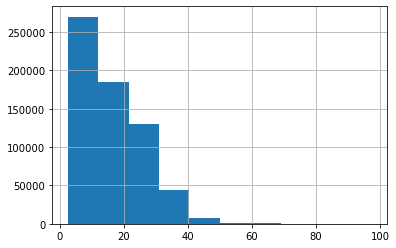

In [16]:
DF['price'].hist()

In [17]:
stats.trim_mean(DF['price'],0.1)

17.16896103755566

In [18]:
DF['destination'].mode()

0    Financial District
Name: destination, dtype: object

In [19]:
stats.mode(DF.head(100000)['destination'])

ModeResult(mode=array(['Boston University'], dtype=object), count=array([8778]))

In [40]:
WT = pd.read_csv('../../datasets/weather.csv')
WT

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [41]:
WT.corr()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
temp,1.000000,0.504693,-0.278630,0.169786,-0.273311,0.387265,0.115752
clouds,0.504693,1.000000,-0.079788,0.157744,-0.097839,0.518758,0.041117
pressure,-0.278630,-0.079788,1.000000,-0.012662,0.519631,-0.101814,-0.543793
rain,0.169786,0.157744,-0.012662,1.000000,-0.208693,0.152143,0.331758
time_stamp,-0.273311,-0.097839,0.519631,-0.208693,1.000000,-0.288118,0.039846
humidity,0.387265,0.518758,-0.101814,0.152143,-0.288118,1.000000,-0.285823
wind,0.115752,0.041117,-0.543793,0.331758,0.039846,-0.285823,1.000000


In [21]:
BTC = pd.read_csv('../../datasets/BTC-USD.csv')
BTC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,1.029120e+10
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,1.684660e+10
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,1.687190e+10
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,2.178320e+10
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,2.384090e+10
...,...,...,...,...,...,...,...
1283,2021-07-07,34225.679688,34997.664063,33839.289063,33855.328125,33855.328125,2.479603e+10
1284,2021-07-08,33889.605469,33907.906250,32133.183594,32877.371094,32877.371094,2.991040e+10
1285,2021-07-09,32861.671875,34042.292969,32318.880859,33798.011719,33798.011719,2.743602e+10
1286,2021-07-10,33811.242188,34209.070313,33116.011719,33520.519531,33520.519531,2.297187e+10


<AxesSubplot:>

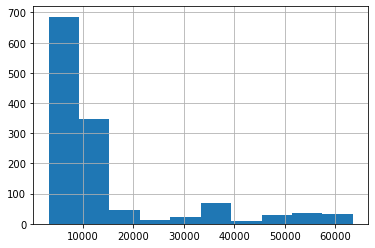

In [22]:
BTC['Adj Close'].hist()

In [39]:
BTC.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999236,0.998442,0.998080,0.998080,0.710317
High,0.999236,1.000000,0.998386,0.999157,0.999157,0.714815
Low,0.998442,0.998386,1.000000,0.999012,0.999012,0.700057
Close,0.998080,0.999157,0.999012,1.000000,1.000000,0.708684
Adj Close,0.998080,0.999157,0.999012,1.000000,1.000000,0.708684
Volume,0.710317,0.714815,0.700057,0.708684,0.708684,1.000000


In [23]:
BTC['Adj Close'].skew()

2.064304556099543

In [24]:
BTC['Adj Close'].kurtosis()

3.1167807522170663

In [29]:
DF['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [30]:
DF['price'].median()

13.5

<AxesSubplot:>

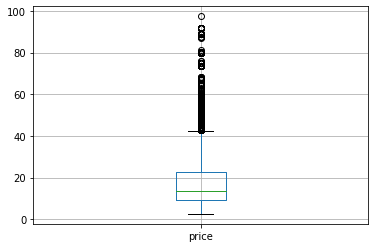

In [31]:
DF.boxplot(column=['price'])

<AxesSubplot:>

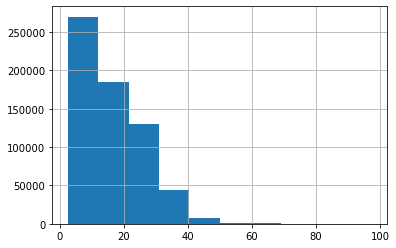

In [32]:
DF['price'].hist()

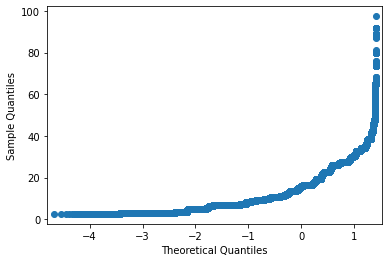

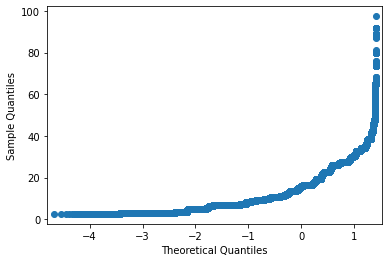

In [33]:
sm.qqplot(DF['price'])


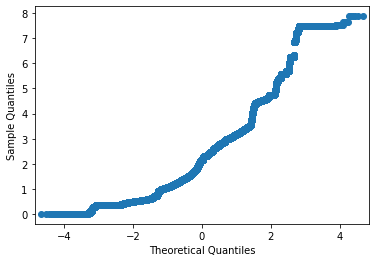

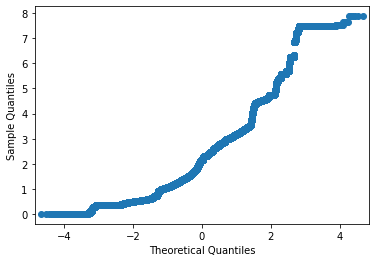

In [34]:
sm.qqplot(DF['distance'])

<AxesSubplot:>

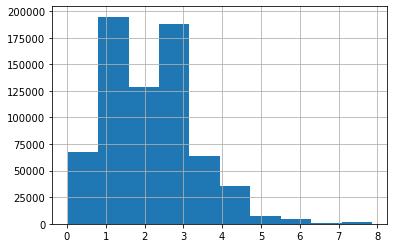

In [35]:
DF['distance'].hist()

In [37]:
DF.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [38]:
DF.corr()

,distance,time_stamp,price,surge_multiplier
distance,1.000000,0.003553,0.345061,0.024769
time_stamp,0.003553,1.000000,0.000808,0.000572
price,0.345061,0.000808,1.000000,0.240458
surge_multiplier,0.024769,0.000572,0.240458,1.000000
